In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline


In [12]:
# read the dataset from dir
df = pd.read_csv("Datas/diabetes.csv")

In [13]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [14]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
# independent feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [17]:
# (row, columns)
df.shape

(768, 9)

In [18]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [19]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

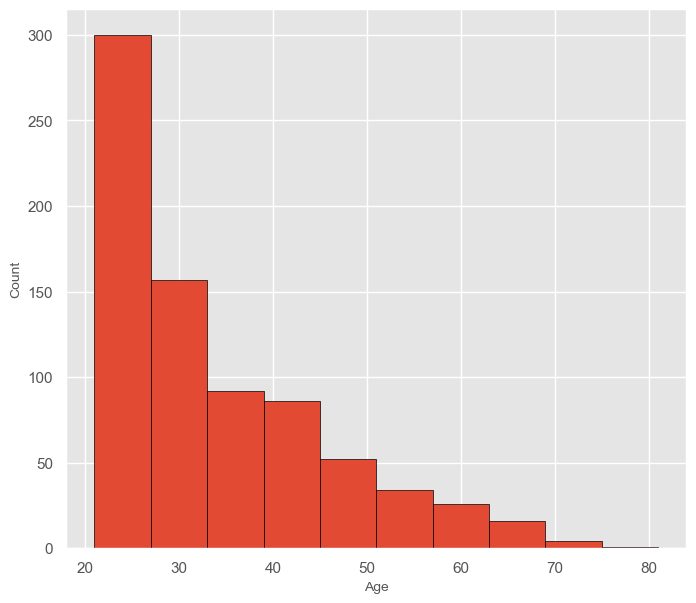

In [20]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [21]:
df['Age'].max()

81

In [22]:
df['Age'].min()

21

In [23]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

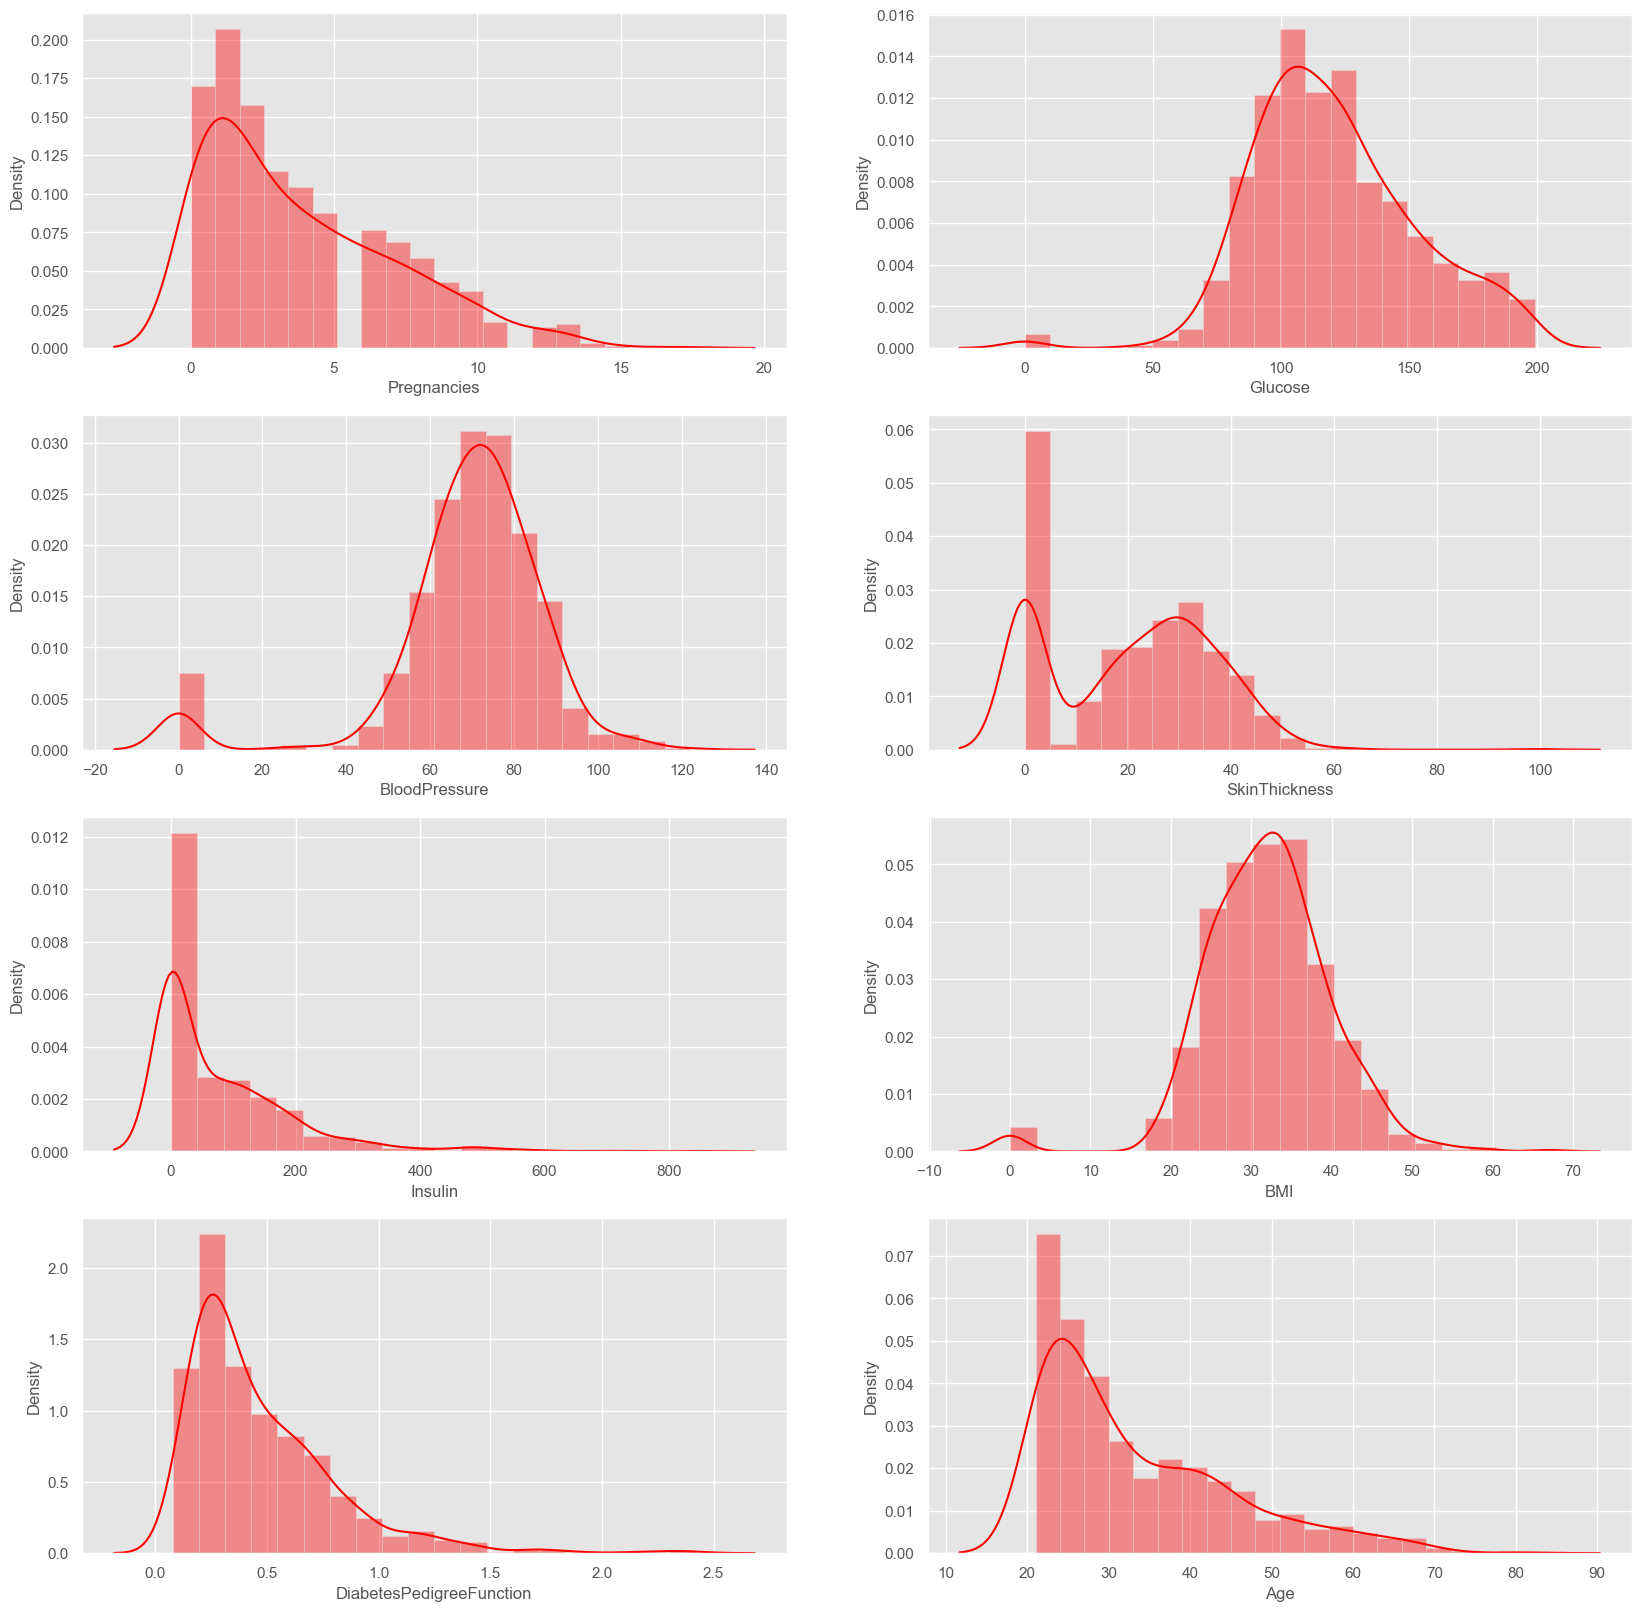

In [25]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")


In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

Pregnancies
Outcome             
0           3.298000
1           4.865672

In [28]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

Pregnancies
Outcome             
0                 13
1                 17

In [29]:
df.groupby("Outcome").agg({'Glucose':'mean'})

Glucose
Outcome            
0        109.980000
1        141.257463

In [30]:
df.groupby("Outcome").agg({'Glucose':'max'})

Glucose
Outcome         
0            197
1            199

In [31]:
# Homework
# 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
#     groupby-> mean/max

TypeError: countplot() got multiple values for argument 'data'

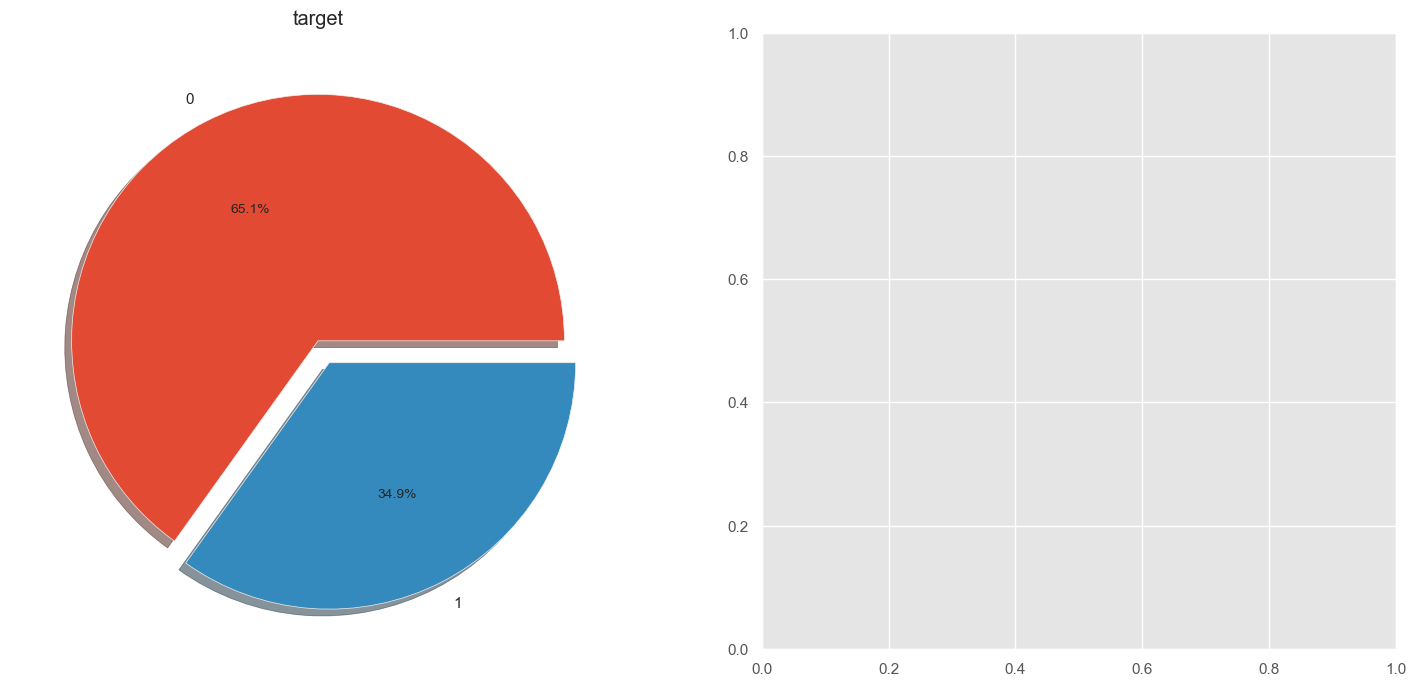

In [32]:
# 0>healthy
# 1>diabetes

f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [33]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

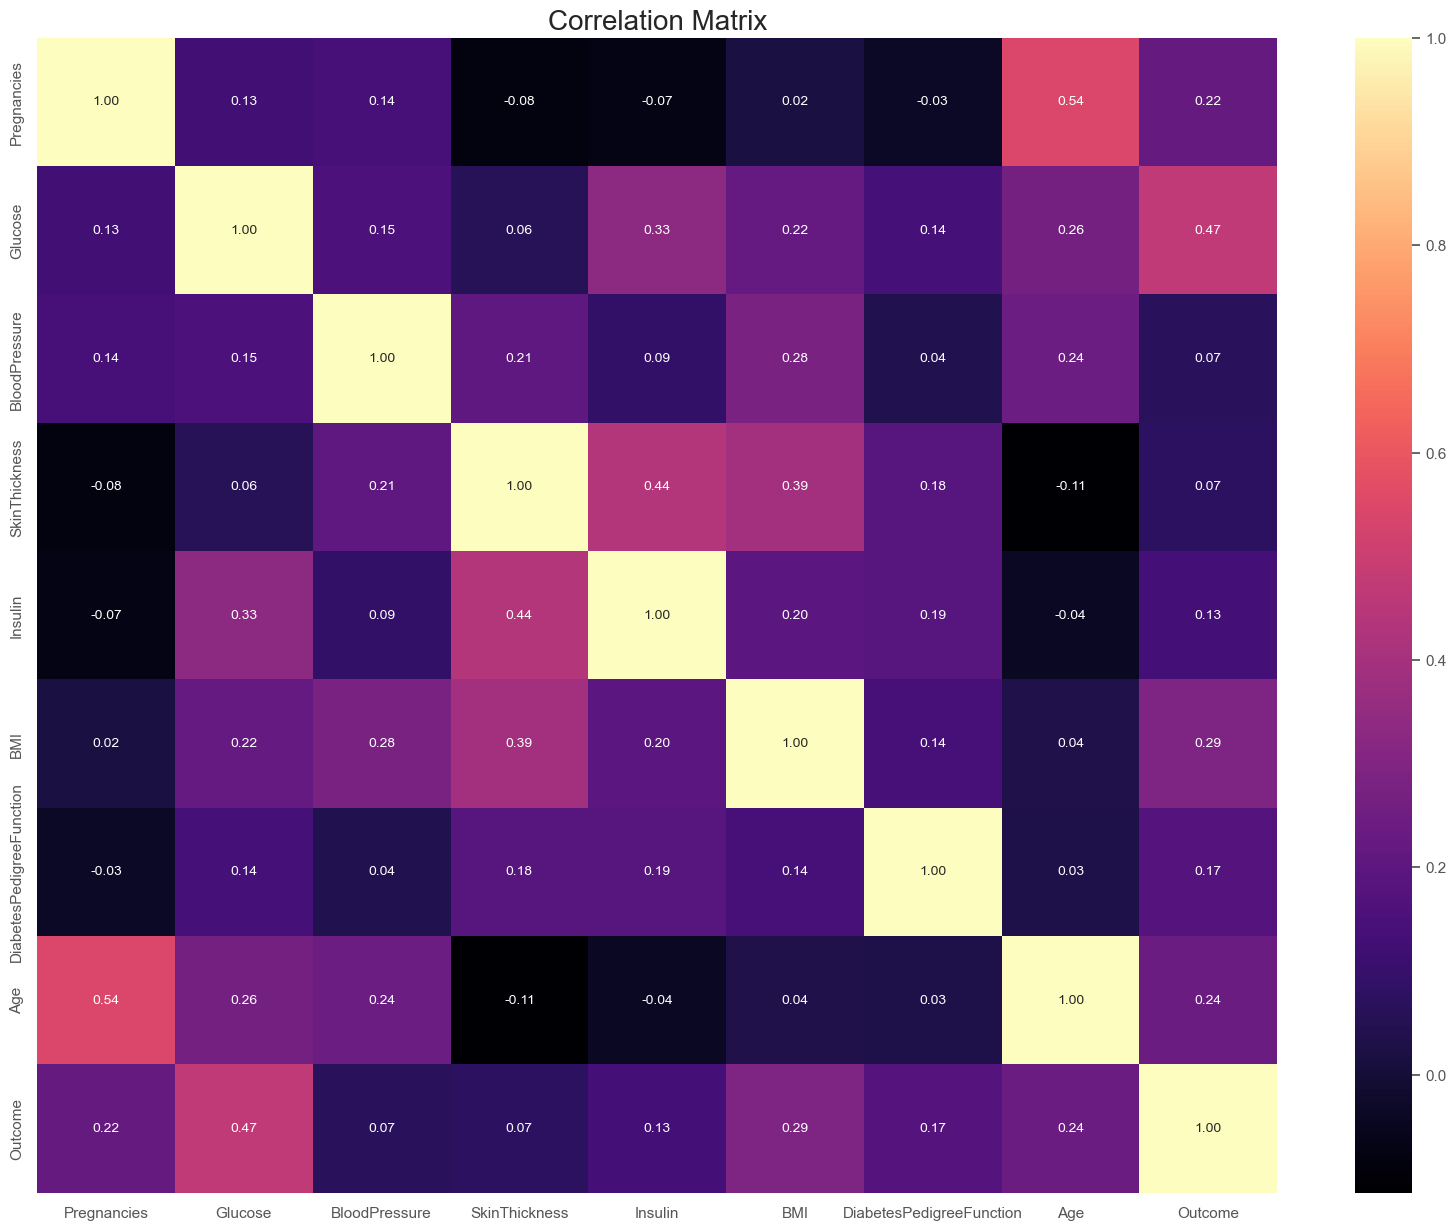

In [34]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [35]:
# EDA Part Completed
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [81]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [82]:
# Data preprocessing Part
df.isnull().sum()

Pregnancies                 110
Glucose                       0
BloodPressure                35
SkinThickness               226
Insulin                     367
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
NewBMI_Obesity 1              0
NewBMI_Obesity 2              0
NewBMI_Obesity 3              0
NewBMI_Overweight             0
NewBMI_Underweight            0
NewInsulinScore_Normal        0
NewGlucose_Low                0
NewGlucose_Normal             0
NewGlucose_Overweight         0
NewGlucose_Secret             0
dtype: int64

In [83]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0      NaN  33.6   
1          1.0       85           66.0           29.0      NaN  26.6   
2          8.0      183           64.0            NaN      NaN  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          NaN      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                     0.627   50        1             False              True   
1                     0.351   31        0             False              True   
2                     0.672   32        1             False              True   
3                     0.167   21        0             False              True   
4                     2.288   33        1             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False              False               False   
1             False              False               False   
2             False              False               False   
3             False              False               False   
4              True              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False              False   
1                   False           False               True   
2                   False           False              False   
3                    True           False               True   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                  False               True  
1                  False              False  
2                  False               True  
3                  False              False  
4                  False               True

<Axes: >

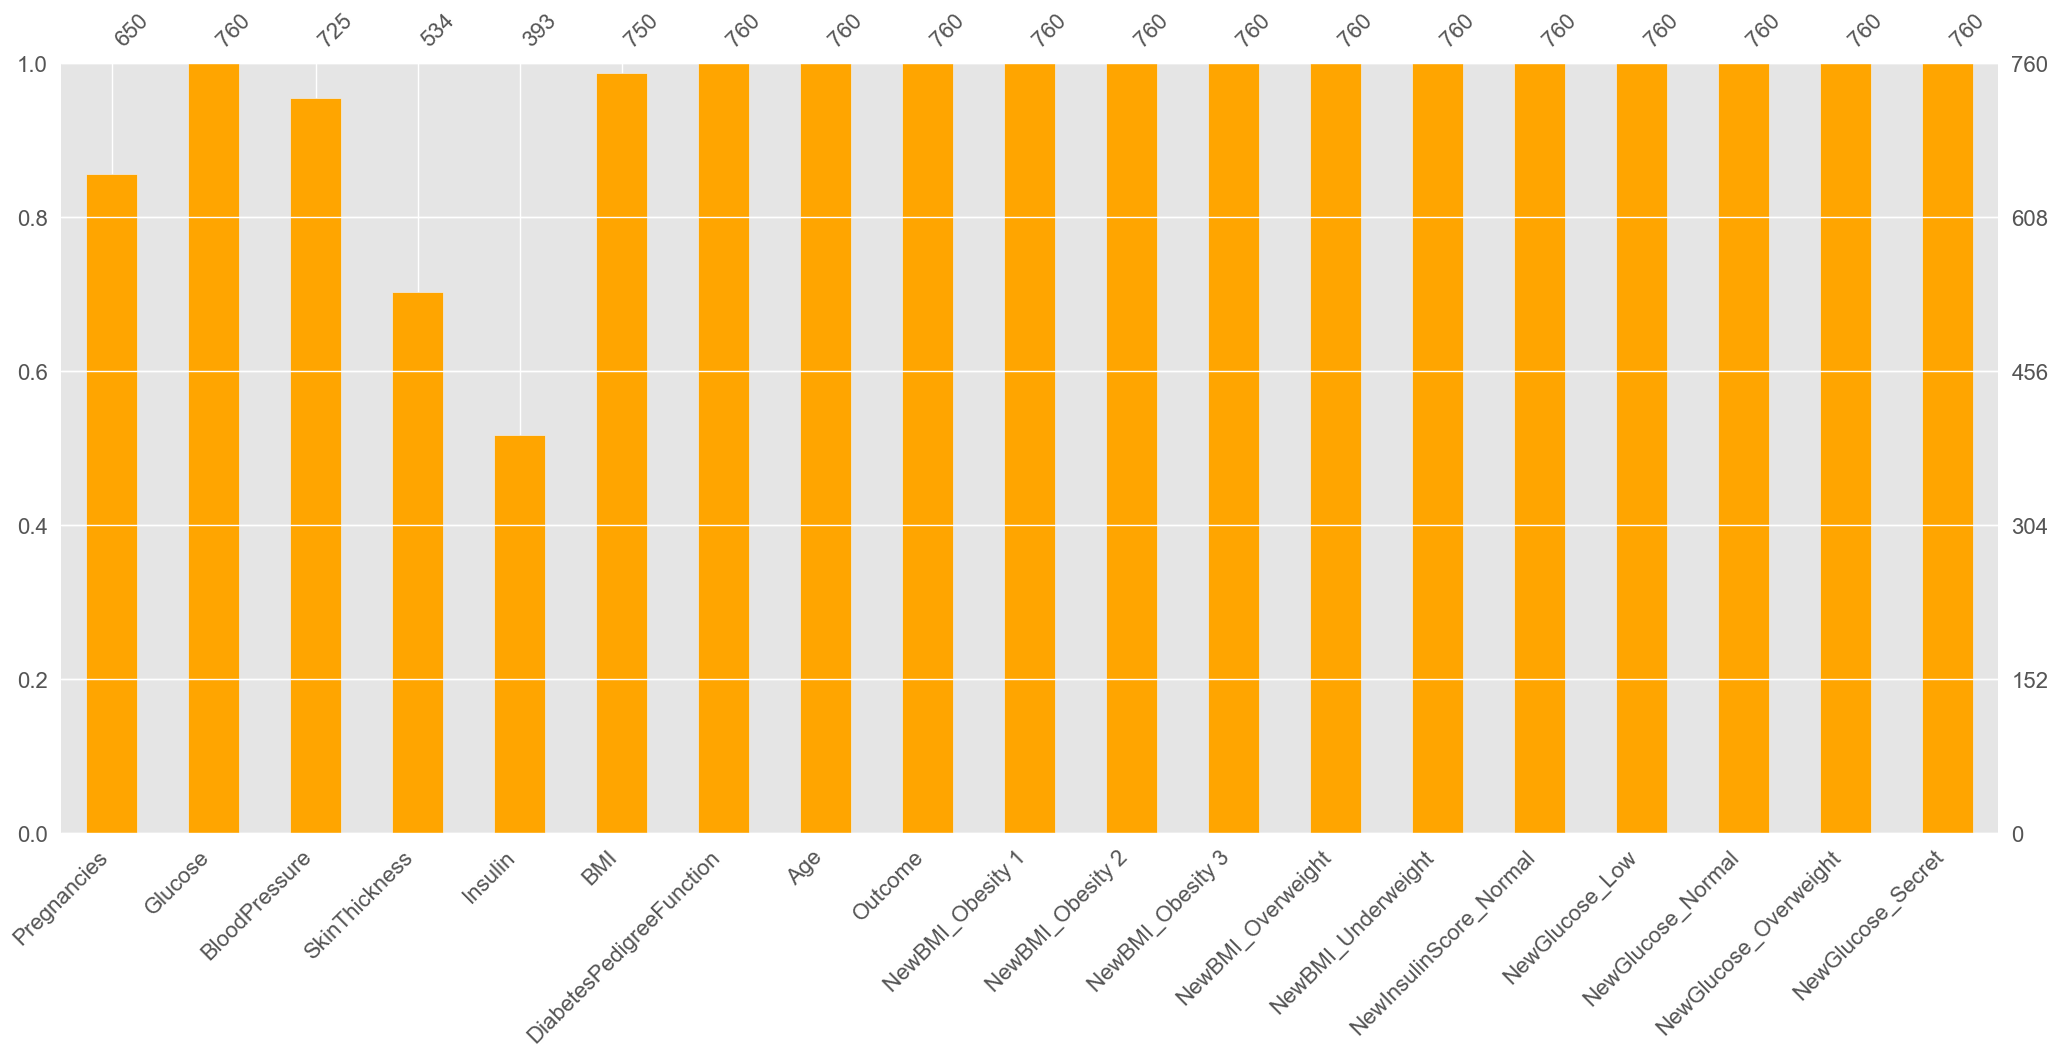

In [84]:
import missingno as msno
msno.bar(df, color="orange")

In [85]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [86]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [87]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0    169.5  33.6   
1          1.0       85           66.0           29.0    105.0  26.6   
2          8.0      183           64.0           32.0    169.5  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          5.0      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome NewBMI_Obesity 1 NewBMI_Obesity 2  \
0                     0.627   50        1            False             True   
1                     0.351   31        0            False             True   
2                     0.672   32        1            False             True   
3                     0.167   21        0            False             True   
4                     2.288   33        1            False            False   

  NewBMI_Obesity 3 NewBMI_Overweight NewBMI_Underweight  \
0            False             False              False   
1            False             False              False   
2            False             False              False   
3            False             False              False   
4             True             False              False   

  NewInsulinScore_Normal NewGlucose_Low NewGlucose_Normal  \
0                  False          False             False   
1                  False          False              True   
2                  False          False             False   
3                   True          False              True   
4                  False          False             False   

  NewGlucose_Overweight NewGlucose_Secret  
0                 False              True  
1                 False             False  
2                 False              True  
3                 False             False  
4                 False              True

In [88]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
NewBMI_Obesity 1            0
NewBMI_Obesity 2            0
NewBMI_Obesity 3            0
NewBMI_Overweight           0
NewBMI_Underweight          0
NewInsulinScore_Normal      0
NewGlucose_Low              0
NewGlucose_Normal           0
NewGlucose_Overweight       0
NewGlucose_Secret           0
dtype: int64

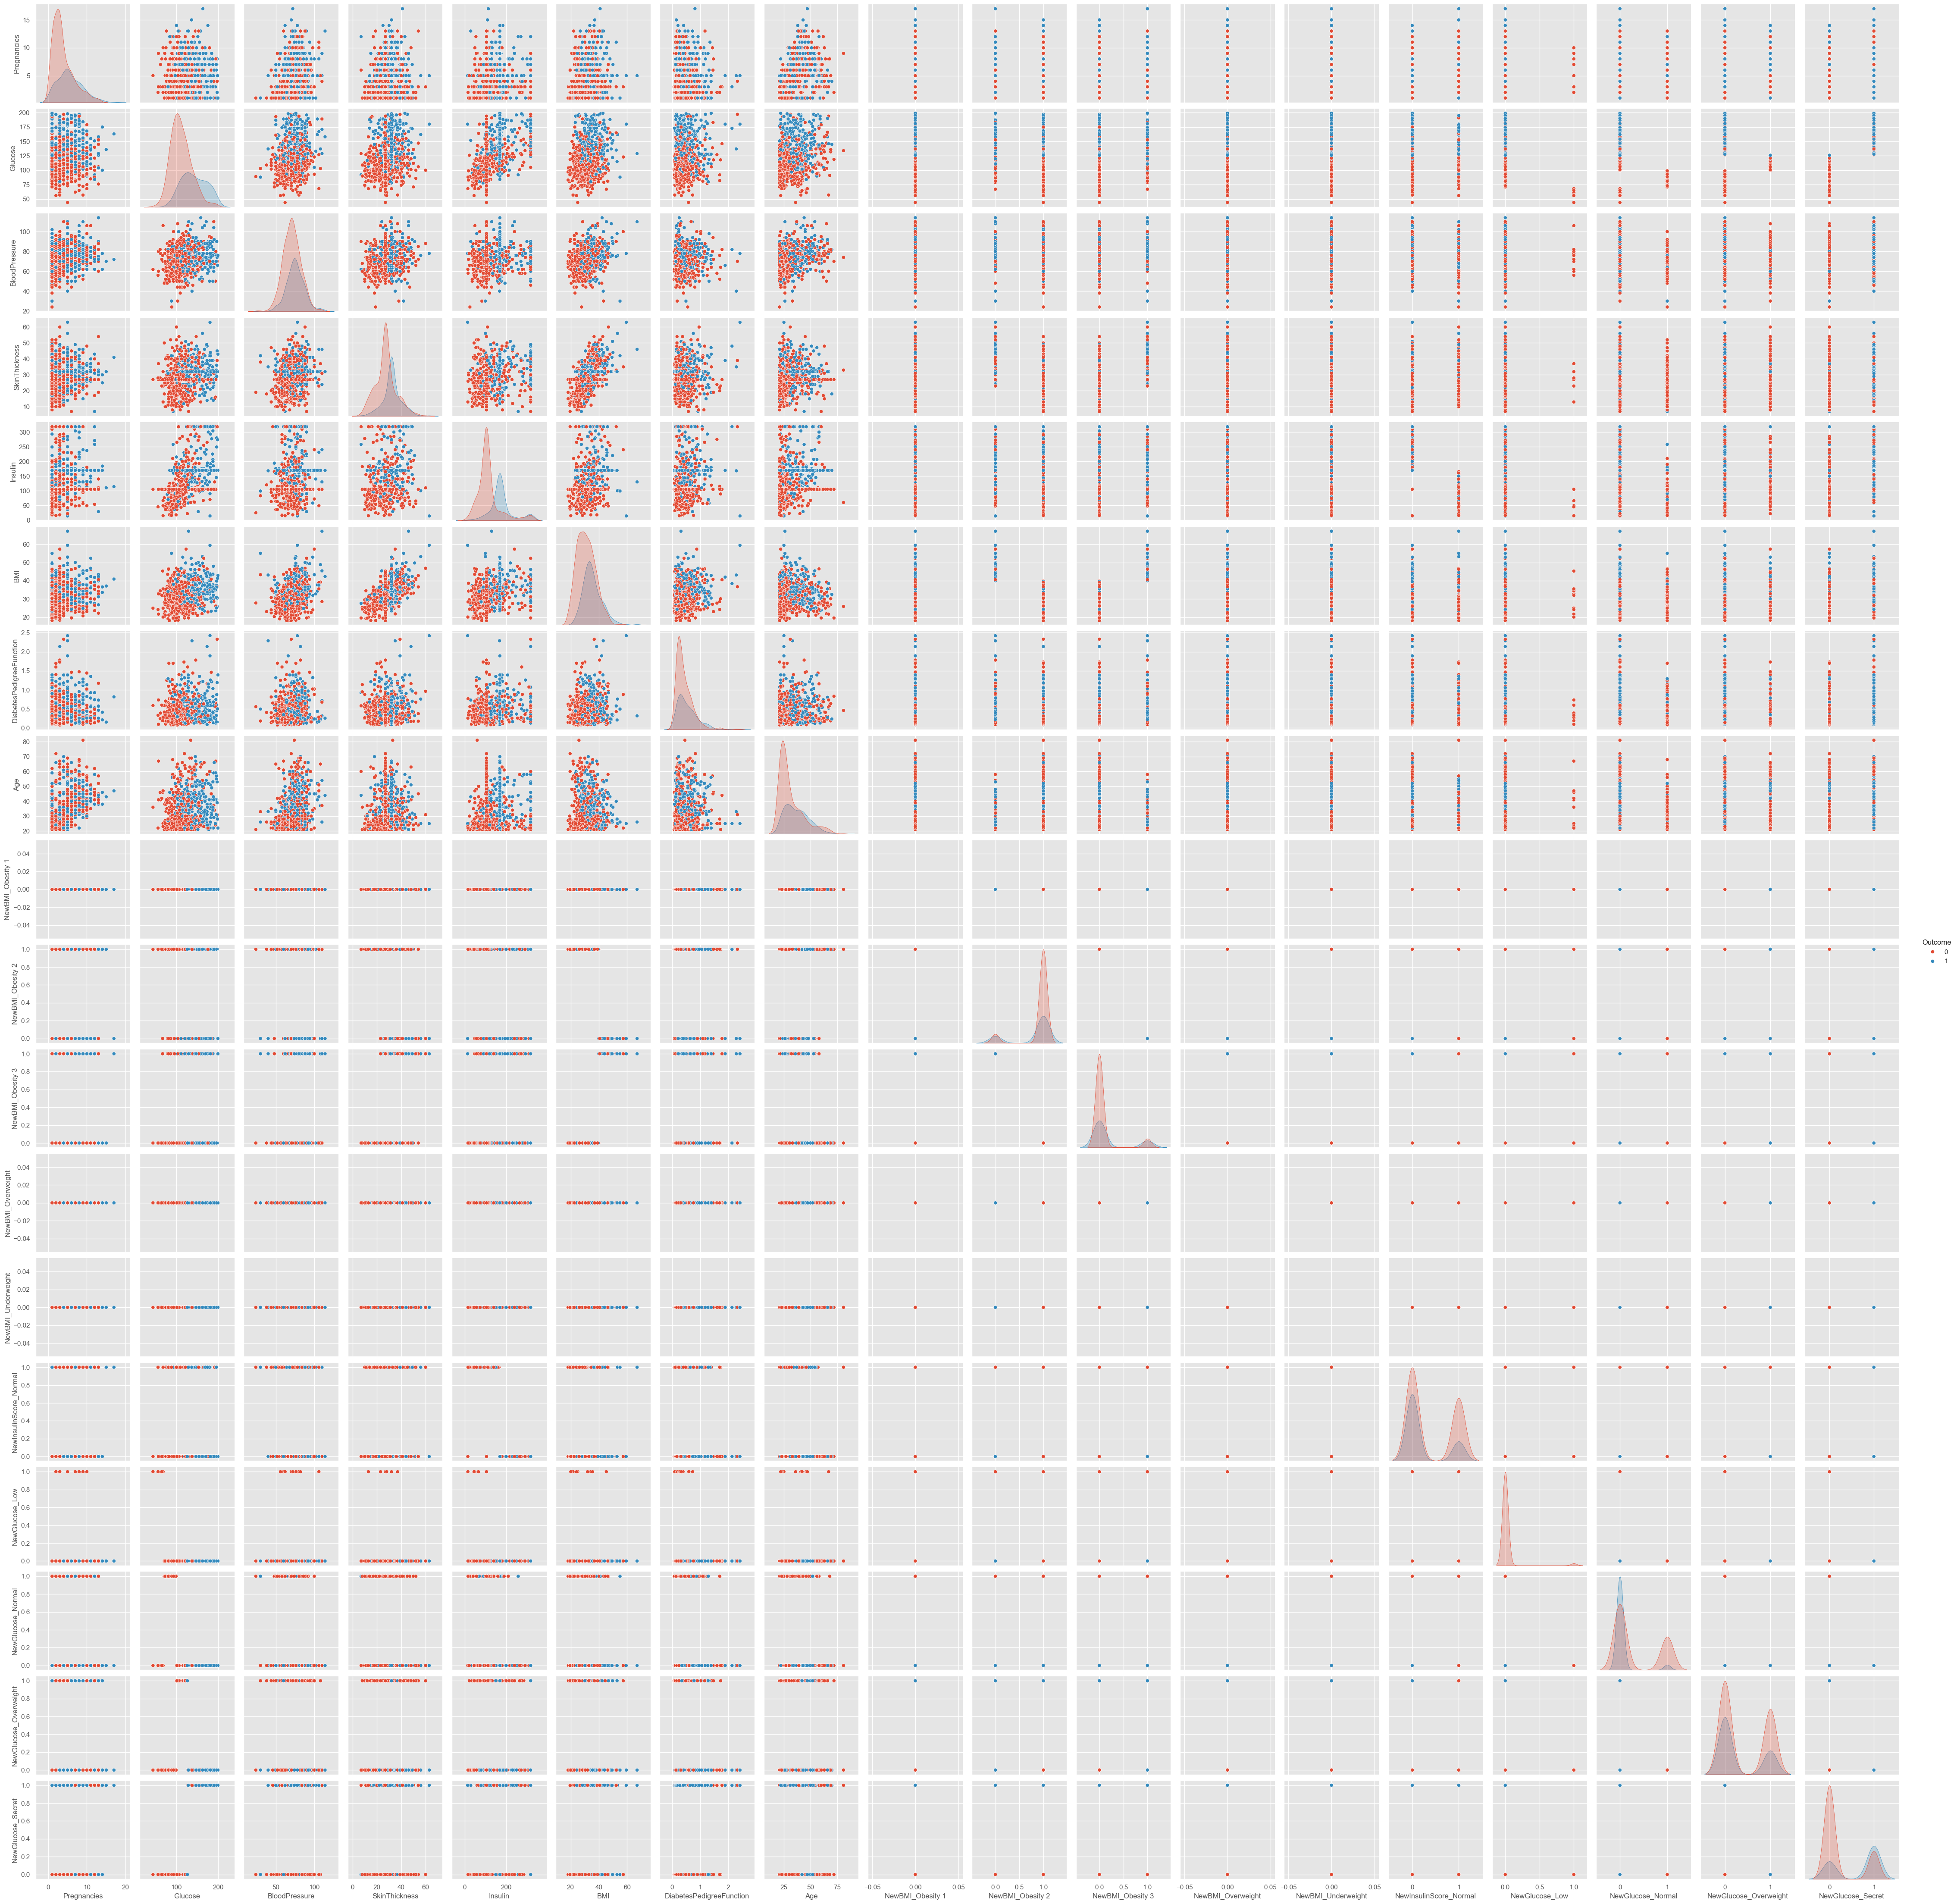

In [89]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [90]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no
NewBMI_Obesity 1 no
NewBMI_Obesity 2 no
NewBMI_Obesity 3 yes
NewBMI_Overweight no
NewBMI_Underweight no
NewInsulinScore_Normal no
NewGlucose_Low yes
NewGlucose_Normal yes
NewGlucose_Overweight no
NewGlucose_Secret no


<Axes: xlabel='Insulin'>

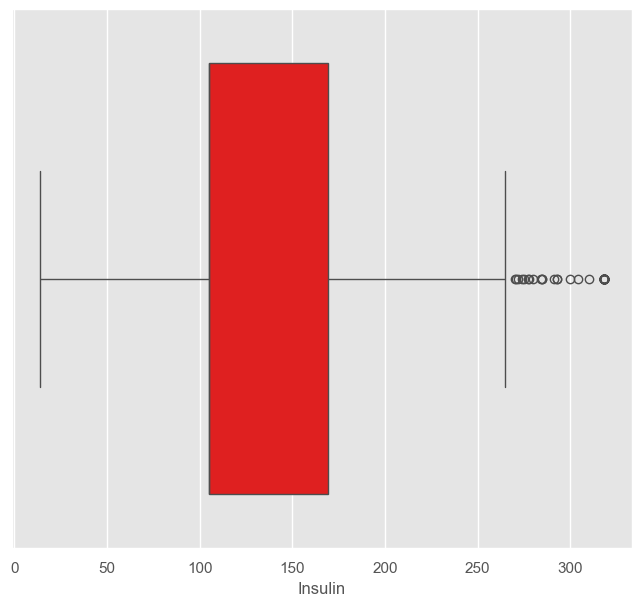

In [91]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [92]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

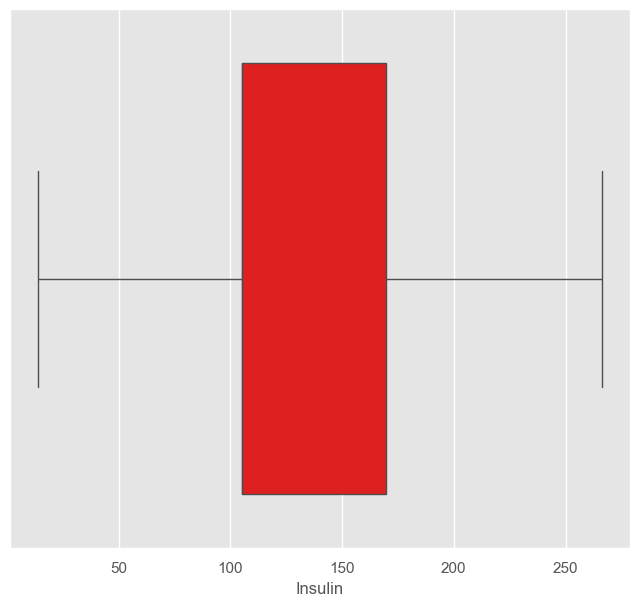

In [93]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [94]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [95]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0    169.5  33.6   
1          1.0       85           66.0           29.0    105.0  26.6   
2          8.0      183           64.0           32.0    169.5  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          5.0      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome NewBMI_Obesity 1 NewBMI_Obesity 2  \
0                     0.627   50        1            False             True   
1                     0.351   31        0            False             True   
2                     0.672   32        1            False             True   
3                     0.167   21        0            False             True   
4                     2.288   33        1            False            False   

  NewBMI_Obesity 3 NewBMI_Overweight NewBMI_Underweight  \
0            False             False              False   
1            False             False              False   
2            False             False              False   
3            False             False              False   
4             True             False              False   

  NewInsulinScore_Normal NewGlucose_Low NewGlucose_Normal  \
0                  False          False             False   
1                  False          False              True   
2                  False          False             False   
3                   True          False              True   
4                  False          False             False   

  NewGlucose_Overweight NewGlucose_Secret  
0                 False              True  
1                 False             False  
2                 False              True  
3                 False             False  
4                 False              True

<Axes: xlabel='Pregnancies'>

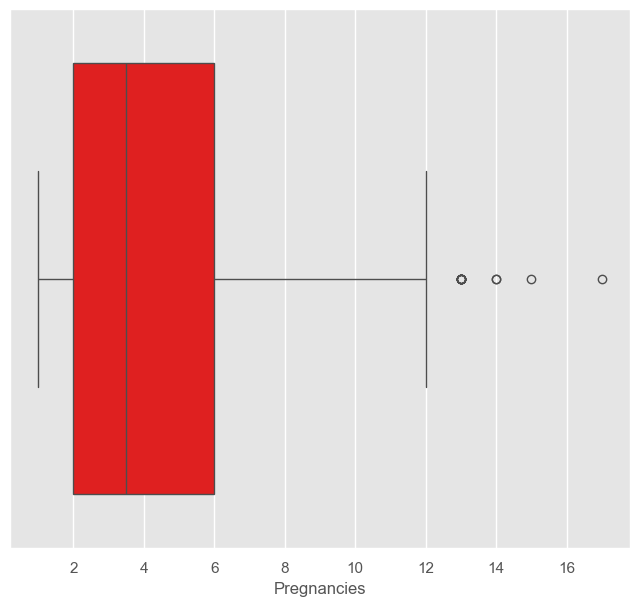

In [96]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [97]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-2.3551634 , -2.14825031, -2.13543702, -1.95435185, -1.81638006,
       -1.79717508, -1.73433041, -1.700849  , -1.69695778, -1.64722727,
       -1.6460296 , -1.63419492, -1.61731532, -1.60823989, -1.60697199,
       -1.60559975, -1.59802588, -1.57955963, -1.57640529, -1.53886811])

In [98]:
thresold = np.sort(df_scores)[7]

In [99]:
thresold

-1.7008489971994663

In [100]:
outlier = df_scores>thresold

In [101]:
df = df[outlier]

In [103]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0    169.5  33.6   
1          1.0       85           66.0           29.0    105.0  26.6   
2          8.0      183           64.0           32.0    169.5  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          5.0      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome NewBMI_Obesity 1 NewBMI_Obesity 2  \
0                     0.627   50        1            False             True   
1                     0.351   31        0            False             True   
2                     0.672   32        1            False             True   
3                     0.167   21        0            False             True   
4                     2.288   33        1            False            False   

  NewBMI_Obesity 3 NewBMI_Overweight NewBMI_Underweight  \
0            False             False              False   
1            False             False              False   
2            False             False              False   
3            False             False              False   
4             True             False              False   

  NewInsulinScore_Normal NewGlucose_Low NewGlucose_Normal  \
0                  False          False             False   
1                  False          False              True   
2                  False          False             False   
3                   True          False              True   
4                  False          False             False   

  NewGlucose_Overweight NewGlucose_Secret  
0                 False              True  
1                 False             False  
2                 False              True  
3                 False             False  
4                 False              True

In [104]:
df.shape

(752, 19)

<Axes: xlabel='Pregnancies'>

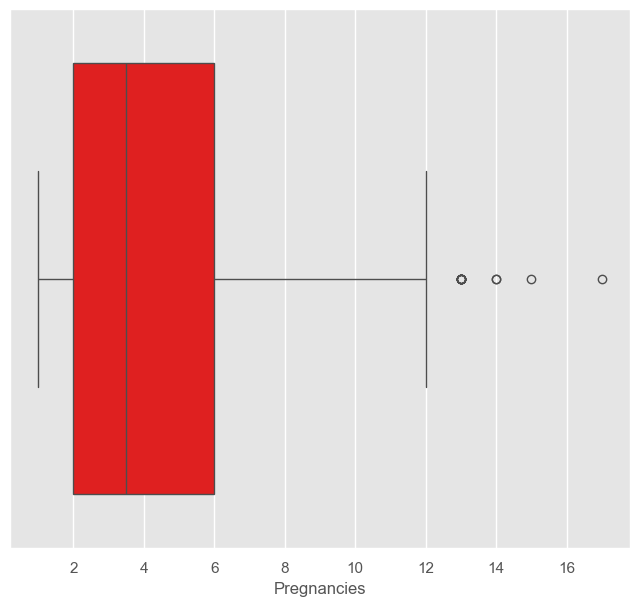

In [105]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [106]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [107]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [108]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [109]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0    169.5  33.6   
1          1.0       85           66.0           29.0    105.0  26.6   
2          8.0      183           64.0           32.0    169.5  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          5.0      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome NewBMI_Obesity 1 NewBMI_Obesity 2  \
0                     0.627   50        1            False             True   
1                     0.351   31        0            False             True   
2                     0.672   32        1            False             True   
3                     0.167   21        0            False             True   
4                     2.288   33        1            False            False   

  NewBMI_Obesity 3 NewBMI_Overweight NewBMI_Underweight  \
0            False             False              False   
1            False             False              False   
2            False             False              False   
3            False             False              False   
4             True             False              False   

  NewInsulinScore_Normal NewGlucose_Low NewGlucose_Normal  \
0                  False          False             False   
1                  False          False              True   
2                  False          False             False   
3                   True          False              True   
4                  False          False             False   

  NewGlucose_Overweight NewGlucose_Secret     NewBMI  
0                 False              True  Obesity 2  
1                 False             False  Obesity 2  
2                 False              True  Obesity 2  
3                 False             False  Obesity 2  
4                 False              True  Obesity 3

In [110]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [111]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [112]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0    169.5  33.6   
1          1.0       85           66.0           29.0    105.0  26.6   
2          8.0      183           64.0           32.0    169.5  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          5.0      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome NewBMI_Obesity 1  ...  \
0                     0.627   50        1            False  ...   
1                     0.351   31        0            False  ...   
2                     0.672   32        1            False  ...   
3                     0.167   21        0            False  ...   
4                     2.288   33        1            False  ...   

  NewBMI_Obesity 3 NewBMI_Overweight NewBMI_Underweight  \
0            False             False              False   
1            False             False              False   
2            False             False              False   
3            False             False              False   
4             True             False              False   

  NewInsulinScore_Normal NewGlucose_Low NewGlucose_Normal  \
0                  False          False             False   
1                  False          False              True   
2                  False          False             False   
3                   True          False              True   
4                  False          False             False   

  NewGlucose_Overweight NewGlucose_Secret     NewBMI NewInsulinScore  
0                 False              True  Obesity 2        Abnormal  
1                 False             False  Obesity 2          Normal  
2                 False              True  Obesity 2        Abnormal  
3                 False             False  Obesity 2          Normal  
4                 False              True  Obesity 3        Abnormal  

[5 rows x 21 columns]

In [113]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [114]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0    169.5  33.6   
1          1.0       85           66.0           29.0    105.0  26.6   
2          8.0      183           64.0           32.0    169.5  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          5.0      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome NewBMI_Obesity 1  ...  \
0                     0.627   50        1            False  ...   
1                     0.351   31        0            False  ...   
2                     0.672   32        1            False  ...   
3                     0.167   21        0            False  ...   
4                     2.288   33        1            False  ...   

  NewBMI_Overweight NewBMI_Underweight NewInsulinScore_Normal NewGlucose_Low  \
0             False              False                  False          False   
1             False              False                  False          False   
2             False              False                  False          False   
3             False              False                   True          False   
4             False              False                  False          False   

  NewGlucose_Normal NewGlucose_Overweight NewGlucose_Secret     NewBMI  \
0             False                 False              True  Obesity 2   
1              True                 False             False  Obesity 2   
2             False                 False              True  Obesity 2   
3              True                 False             False  Obesity 2   
4             False                 False              True  Obesity 3   

  NewInsulinScore NewGlucose  
0        Abnormal     Secret  
1          Normal     Normal  
2        Abnormal     Secret  
3          Normal     Normal  
4        Abnormal     Secret  

[5 rows x 22 columns]

In [115]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [116]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0    169.5  33.6   
1          1.0       85           66.0           29.0    105.0  26.6   
2          8.0      183           64.0           32.0    169.5  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          5.0      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome NewBMI_Obesity 1  ...  \
0                     0.627   50        1            False  ...   
1                     0.351   31        0            False  ...   
2                     0.672   32        1            False  ...   
3                     0.167   21        0            False  ...   
4                     2.288   33        1            False  ...   

  NewBMI_Obesity 1 NewBMI_Obesity 2 NewBMI_Obesity 3 NewBMI_Overweight  \
0            False             True            False             False   
1            False             True            False             False   
2            False             True            False             False   
3            False             True            False             False   
4            False            False             True             False   

  NewBMI_Underweight NewInsulinScore_Normal NewGlucose_Low NewGlucose_Normal  \
0              False                  False          False             False   
1              False                   True          False              True   
2              False                  False          False             False   
3              False                   True          False              True   
4              False                  False          False             False   

  NewGlucose_Overweight  NewGlucose_Secret  
0                 False               True  
1                 False              False  
2                 False               True  
3                 False              False  
4                 False               True  

[5 rows x 29 columns]

In [117]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret',
       'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal',
       'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight',
       'NewGlucose_Secret'],
      dtype='object')

In [118]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [119]:
categorical_df.head()

NewBMI_Obesity 1  NewBMI_Obesity 1  NewBMI_Obesity 2  NewBMI_Obesity 2  \
0             False             False              True              True   
1             False             False              True              True   
2             False             False              True              True   
3             False             False              True              True   
4             False             False             False             False   

   NewBMI_Obesity 3  NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Overweight  \
0             False             False              False              False   
1             False             False              False              False   
2             False             False              False              False   
3             False             False              False              False   
4              True              True              False              False   

   NewBMI_Underweight  NewBMI_Underweight  NewInsulinScore_Normal  \
0               False               False                   False   
1               False               False                   False   
2               False               False                   False   
3               False               False                    True   
4               False               False                   False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False           False              False   
1                    True           False           False               True   
2                   False           False           False              False   
3                    True           False           False               True   
4                   False           False           False              False   

   NewGlucose_Normal  NewGlucose_Overweight  NewGlucose_Overweight  \
0              False                  False                  False   
1               True                  False                  False   
2              False                  False                  False   
3               True                  False                  False   
4              False                  False                  False   

   NewGlucose_Secret  NewGlucose_Secret  
0               True               True  
1              False              False  
2               True               True  
3              False              False  
4               True               True

In [120]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [121]:
cols = X.columns
index = X.index

In [122]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148           72.0           35.0    169.5  33.6   
1          1.0       85           66.0           29.0    105.0  26.6   
2          8.0      183           64.0           32.0    169.5  23.3   
3          1.0       89           66.0           23.0     94.0  28.1   
4          5.0      137           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [123]:
# save cleaned DataFrame as csv
X.to_csv('Datas/cleaned_diabetes.csv', index=False)


In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

In [175]:
X = pd.concat([X, categorical_df], axis=1)

In [79]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      0.0  33.6   
1            1       85             66             29      0.0  26.6   
2            8      183             64              0      0.0  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [177]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [178]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
# Machine Learning Algo

In [182]:
# Logistic Regreesion

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [183]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy_score(y_train, log_reg.predict(X_train))

In [215]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [190]:
# KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

In [ ]:
# best_parameter
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

In [ ]:
grid_search_dt.best_params_

In [ ]:
grid_search_dt.best_score_

In [ ]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

In [204]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

In [ ]:
grid_search_gbc.best_params_

In [ ]:
grid_search_gbc.best_score_

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

In [ ]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

In [225]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()